In [9]:
from defectlib import load_tensors
from defectlib import load_tensors_all
from defectlib import combine_shuffle_tensors, display_tensor, keras_transform, make_model, train_model
from defectlib import Config, remove_sn, remain_sn
from matplotlib import image
from IPython.display import Image
from tqdm import tqdm, trange
import matplotlib.pyplot as plt
import defectlib
import cv2
import os
import numpy as np
%matplotlib inline

In [10]:
defect_dict = load_tensors_all('./Data/For_Andy11.24/Test_Water_Paper/', width=128)

(137, 70, 44)
(79, 70, 44)
(67, 70, 44)
(77, 70, 44)
(36, 41, 76)
(13, 41, 76)
(10, 41, 76)
(23, 41, 76)
(11, 105, 63)
(67, 105, 63)
(72, 105, 63)
(17, 105, 63)


In [3]:
tensors, labels, sns = combine_shuffle_tensors(defect_dict)

the final tensor should be 609
number of class 0: 184
	number of SN: 9
number of class 1: 159
	number of SN: 5
number of class 2: 149
	number of SN: 5
number of class 3: 117
	number of SN: 5


In [4]:
tensors_update, labels_update, sns_update = remove_sn(tensors, labels, sns, 'F3X625518LTH9CC21')
tensors_update, labels_update, sns_update = remove_sn(tensors_update, labels_update, sns_update, 'F3Y62760Q82HPCC21')

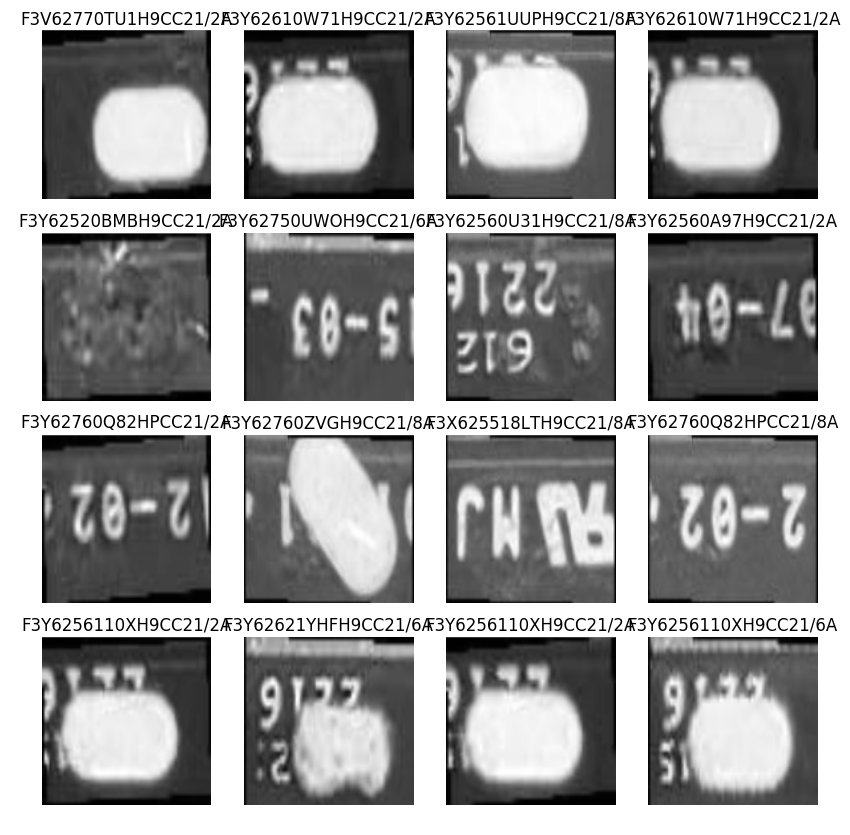

In [81]:
display_tensor(tensors, labels, sns)

In [5]:
from defectlib import GroupKFold_modeling

In [6]:
accuracy_dict, logloss_dict, escape_dict, accuracy_escape_list, models = GroupKFold_modeling(tensors_update, labels_update, sns_update, nb_classes=4, nb_epoch=10, input_shape=(128, 128))

Model 1
the label of validation image: 1
the s/n of validation image: F3Y62551RKDH9CC21
Train on 501 samples, validate on 39 samples
Epoch 1/10
501/501 [==============================] - 8s - loss: 0.9293 - acc: 0.6327 - val_loss: 0.0958 - val_acc: 1.0000
Epoch 2/10
501/501 [==============================] - 8s - loss: 0.5354 - acc: 0.7924 - val_loss: 0.1405 - val_acc: 1.0000
Epoch 3/10
501/501 [==============================] - 8s - loss: 0.3370 - acc: 0.8643 - val_loss: 0.0353 - val_acc: 1.0000
Epoch 4/10
501/501 [==============================] - 8s - loss: 0.2707 - acc: 0.8942 - val_loss: 0.0805 - val_acc: 1.0000
Epoch 5/10
501/501 [==============================] - 8s - loss: 0.1865 - acc: 0.9301 - val_loss: 0.0046 - val_acc: 1.0000
Epoch 6/10
501/501 [==============================] - 7s - loss: 0.1620 - acc: 0.9401 - val_loss: 0.0122 - val_acc: 1.0000
Epoch 7/10
501/501 [==============================] - 8s - loss: 0.0884 - acc: 0.9721 - val_loss: 0.0088 - val_acc: 1.0000
Epoch 

In [4]:
accuracy_dict

NameError: name 'accuracy_dict' is not defined

In [8]:
escape_dict

{0: 0.6547619047619047, 1: 0.0, 2: 0.0, 3: 0.65}

In [9]:
accuracy_escape_list

[(1, 'F3Y62551RKDH9CC21', 1.0, 0.0),
 (1, 'F3Y62560U31H9CC21', 1.0, 0.0),
 (1, 'F3Y62750UWOH9CC21', 0.91666666666666663, 0.0),
 (2, 'F3Y6251VH7H9CC21', 1.0, 0.0),
 (3, 'F3Y62621YHFH9CC21', 1.0, 0.0),
 (1, 'F3Y62520BMBH9CC21', 1.0, 0.0),
 (2, 'F3Y62760ZVGH9CC21', 0.55172413793103448, 0.0),
 (0, 'F3X62610SZ2H9CC21', 0.8928571428571429, 0.8928571428571429),
 (3, 'F3Y6256110XH9CC21', 0.0, 1.0),
 (0, 'F3Y62561UUPH9CC21', 1.0, 1.0),
 (0, 'F3X62821FE6H9CC21', 0.0, 0.0),
 (0, 'F3Y62570EBNH9CC21', 1.0, 1.0),
 (3, 'F3Y62611EGEH9CC21', 0.75, 0.25),
 (3, 'F3X6271269AH9CC21', 0.0, 1.0),
 (0, 'F3X62671S1GH9CC21', 0.0, 0.0),
 (0, 'F3Y6262015EH9CC21', 1.0, 1.0),
 (0, 'F3X62571GREH9CC21', 1.0, 1.0),
 (0, 'F3Y62610W71H9CC21', 1.0, 1.0),
 (3, 'F3Y62540DMTH9CC21', 0.0, 1.0),
 (1, 'F3Y62560A97H9CC21', 1.0, 0.0),
 (2, 'F3X62630KAXH9CC21', 0.0, 0.0),
 (0, 'F3V62770TU1H9CC21', 0.0, 0.0)]

In [13]:
sorted(accuracy_escape_list, key=lambda x: x[0])

[(0, 'F3X62610SZ2H9CC21', 0.8928571428571429, 0.8928571428571429),
 (0, 'F3Y62561UUPH9CC21', 1.0, 1.0),
 (0, 'F3X62821FE6H9CC21', 0.0, 0.0),
 (0, 'F3Y62570EBNH9CC21', 1.0, 1.0),
 (0, 'F3X62671S1GH9CC21', 0.0, 0.0),
 (0, 'F3Y6262015EH9CC21', 1.0, 1.0),
 (0, 'F3X62571GREH9CC21', 1.0, 1.0),
 (0, 'F3Y62610W71H9CC21', 1.0, 1.0),
 (0, 'F3V62770TU1H9CC21', 0.0, 0.0),
 (1, 'F3Y62551RKDH9CC21', 1.0, 0.0),
 (1, 'F3Y62560U31H9CC21', 1.0, 0.0),
 (1, 'F3Y62750UWOH9CC21', 0.91666666666666663, 0.0),
 (1, 'F3Y62520BMBH9CC21', 1.0, 0.0),
 (1, 'F3Y62560A97H9CC21', 1.0, 0.0),
 (2, 'F3Y6251VH7H9CC21', 1.0, 0.0),
 (2, 'F3Y62760ZVGH9CC21', 0.55172413793103448, 0.0),
 (2, 'F3X62630KAXH9CC21', 0.0, 0.0),
 (3, 'F3Y62621YHFH9CC21', 1.0, 0.0),
 (3, 'F3Y6256110XH9CC21', 0.0, 1.0),
 (3, 'F3Y62611EGEH9CC21', 0.75, 0.25),
 (3, 'F3X6271269AH9CC21', 0.0, 1.0),
 (3, 'F3Y62540DMTH9CC21', 0.0, 1.0)]

In [21]:
[x[0] for x in accuracy_escape_list]

[1, 1, 1, 2, 3, 1, 2, 0, 3, 0, 0, 0, 3, 3, 0, 0, 0, 0, 3, 1, 2, 0]

In [75]:
for label in set([x[0] for x in accuracy_escape_list]):
    accuracy_result = [x[2] for x in accuracy_escape_list if x[0] == label]
    accuracy_result.sort(reverse=True)
    accuracy_final = np.array(accuracy_result)
    escape_tight = 1 - accuracy_final
    escape_result = [x[3] for x in accuracy_escape_list if x[0] == label]
    escape_result.sort()
    escape_final = np.array(escape_result)
    escape_rough = escape_final
    print 'Result for label {}'.format(label)
    print escape_tight
    print escape_rough
    print "\tPick 1 test"
    print '\t\tTight Escape rate: {}'.format(escape_tight[0])
    print '\t\tRough Escape rate: {}'.format(escape_rough[0])
    print "\tPick 2 test"
    print "\t\tTight Escape rate: {}".format((escape_tight[0] + escape_tight[1]) / 2)
    print "\t\trough Escape rate: {}".format((escape_rough[0] + escape_rough[1]) / 2)

Result for label 0
[ 0.          0.          0.          0.          0.          0.10714286
  1.          1.          1.        ]
[ 0.          0.          0.          0.89285714  1.          1.          1.
  1.          1.        ]
	Pick 1 test
		Tight Escape rate: 0.0
		Rough Escape rate: 0.0
	Pick 2 test
		Tight Escape rate: 0.0
		rough Escape rate: 0.0
Result for label 1
[ 0.          0.          0.          0.          0.08333333]
[ 0.  0.  0.  0.  0.]
	Pick 1 test
		Tight Escape rate: 0.0
		Rough Escape rate: 0.0
	Pick 2 test
		Tight Escape rate: 0.0
		rough Escape rate: 0.0
Result for label 2
[ 0.          0.44827586  1.        ]
[ 0.  0.  0.]
	Pick 1 test
		Tight Escape rate: 0.0
		Rough Escape rate: 0.0
	Pick 2 test
		Tight Escape rate: 0.224137931034
		rough Escape rate: 0.0
Result for label 3
[ 0.    0.25  1.    1.    1.  ]
[ 0.    0.25  1.    1.    1.  ]
	Pick 1 test
		Tight Escape rate: 0.0
		Rough Escape rate: 0.0
	Pick 2 test
		Tight Escape rate: 0.125
		rough Escape rat

In [48]:
print accuracy_final

[ 0.    0.    0.    0.75  1.  ]


array([ 1.  ,  0.75,  0.  ,  0.  ,  0.  ])

In [16]:
1 - ((1 + 0.75) / 2)

0.125

In [15]:
1- ((1.0 + 0.55172413793103448) / 2)

0.22413793103448276

In [20]:
list(accuracy_escape_list[0][1])[0]

'F3Y62551RKDH9CC21'

In [16]:
accuracy_escape_list[0][1]

{'F3Y62551RKDH9CC21'}

In [ ]:
e = {1:39, 4:34, 7:110, 2:87}

In [ ]:
sortE = sorted(e.items(), key=lambda value: -value[1])

In [78]:
test_model = models[0]

In [80]:
test_model.predict_classes?